# Set-Up

###Data

The dataset comprises online subscription business data for the month of January 2018 :

Link - https://assets.datacamp.com/production/repositories/3879/datasets/bdbbd97f839ef5cafebcc15363201d0e7b08881a/marketing.csv

Source: DataCamp

<br>

Variable Description:
- 'user_id' : an identification number identifying each unique user being advertised to
- 'date_served' : the date on which the user is served with an advertisement
- 'marketing_channel' : the marketing channel through which a user was shown an advertisement
- 'variant' : this captures whether the ad was personalised or generic, it will be used to conduct an A/B test for email marketing
- 'converted' : boolean values indicating if a user subscribed
- 'language_displayed' : language in which the ad was shown to a user
- 'language_preferred' : language that the user prefers
- 'age_group' - age bracket of the user
- 'date_subscribed' : date on which a user subscribed to a the product, takes null values for users who did not subscribe
- 'date_canceled' : date on which a user cancelled their subscription
- 'subscribing_channel' : the marketing channel that led to a user subscribing
- 'is_retained' : boolean values indicating if a user was retained after being converted to a subscriber; takes null values for users who were not converted in the first place

###Project Goal

The goal is to use Python, Pandas and Statistics to analyse a business problem that may be potentially faced by data scientists in a marketing team.

<br>

I hope to address the following questions for the given data:
- Evaluate marketing campaign performance
- Attribute credit for conversion to marketing channels
- A/B testing to analyse the impact of a particular advertisement approach

##Importing Data



In [ ]:
import pandas as pd


#loading csv as dataframe while parsing date strings as datetime objects
marketing_data = pd.read_csv('marketing.csv', parse_dates = ['date_served','date_subscribed','date_canceled'])

<ipython-input-70-b7bad4362d4f>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing_data = pd.read_csv('marketing.csv', parse_dates = ['date_served','date_subscribed','date_canceled'])
<ipython-input-70-b7bad4362d4f>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing_data = pd.read_csv('marketing.csv', parse_dates = ['date_served','date_subscribed','date_canceled'])
<ipython-input-70-b7bad4362d4f>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing_data = pd.read_csv('marketing.csv', parse_dates = ['date_served','date_subscribed','date_canceled'])


# Exploratory Data Analysis

###Data Inspection

In [ ]:
#first 5 rows

marketing_data.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [ ]:
#last 5 rows

marketing_data.tail()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True
10036,a100007294,2018-01-06,Facebook,control,False,German,German,0-18 years,2018-01-17,NaT,Email,True


In [ ]:
#summary statistics

marketing_data.describe()

,date_served,date_subscribed,date_canceled
count,10021,1856,577
mean,2018-01-15 05:02:03.221235712,2018-01-14 02:04:08.275862016,2018-03-03 18:28:04.575389952
min,2018-01-01 00:00:00,2018-01-01 00:00:00,2018-01-05 00:00:00
25%,2018-01-08 00:00:00,2018-01-07 00:00:00,2018-02-07 00:00:00
50%,2018-01-15 00:00:00,2018-01-15 00:00:00,2018-03-04 00:00:00
75%,2018-01-22 00:00:00,2018-01-19 00:00:00,2018-04-01 00:00:00
max,2018-01-31 00:00:00,2018-01-31 00:00:00,2018-05-09 00:00:00


In [ ]:
#marketing_data.describe?

In [ ]:
#data types and missing values

marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](3), object(9)
memory usage: 941.1+ KB


object Dtype tells us that all columns have strings

###Feature Engineering

adding new columns that derive information from existing data

In [ ]:
#MAPPING CHANNELS TO CODES


#channel codes
channel_dict = {'House Ads':1, 'Instagram':2, 'Facebook':3, 'Email':4, 'Push':5}

#mapping
marketing_data['channel_code'] = marketing_data['subscribing_channel'].map(channel_dict)


In [ ]:
#checking new column


marketing_data.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0


###Initial Exploratory Analysis

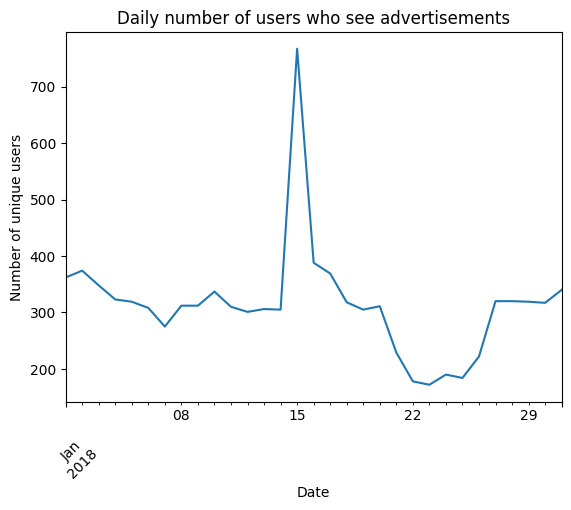

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64


In [ ]:
# checking how many unique users see ads each day

daily_users = marketing_data.groupby('date_served')['user_id'].nunique()

# plotting daily users

import matplotlib.pyplot as plt


daily_users.plot()

plt.title('Daily number of users who see advertisements')
plt.xlabel('Date')
plt.ylabel('Number of unique users')
plt.xticks(rotation = 45)
plt.show()

print(daily_users)

###EDA & Summary Statistics

In marketing, there is some terminology that is important to know:

<br>

- Conversion Rate - the fraction of people who came in contact witht he marketing campaign that acually bought the product.

(#people who bought the product)/(#people who were marketed to)

<br>

- Retention Rate - Once a user has signed up for your product, how many of them remain customers long after they sign up?

(# of people who remained subscribed)/(# of people who converted)

In [ ]:
#CONVERSION RATE



#calculating number of subscribers

subscribers = marketing_data[marketing_data['converted'] == True]['user_id'].nunique()

#calculating people who saw ads

total = marketing_data['user_id'].nunique()

#calculating conversion rate

conversion_rate = subscribers/total

print(f'conversion_rate is {round(conversion_rate*100,3)}%')

conversion_rate is 13.887%


In [ ]:
# RETENTION RATE (1 month retention)

retained = marketing_data[marketing_data['is_retained'] == True]['user_id'].nunique()

retention_rate = retained/subscribers

retention_rate

print(f'retention_rate is {round(retention_rate*100,3)}%')

retention_rate is 66.798%


CUSTOMER SEGMENTATION



Retained
subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


Subscribers
subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


Channel Retention Rate
subscribing_channel
Email        87.577640
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64




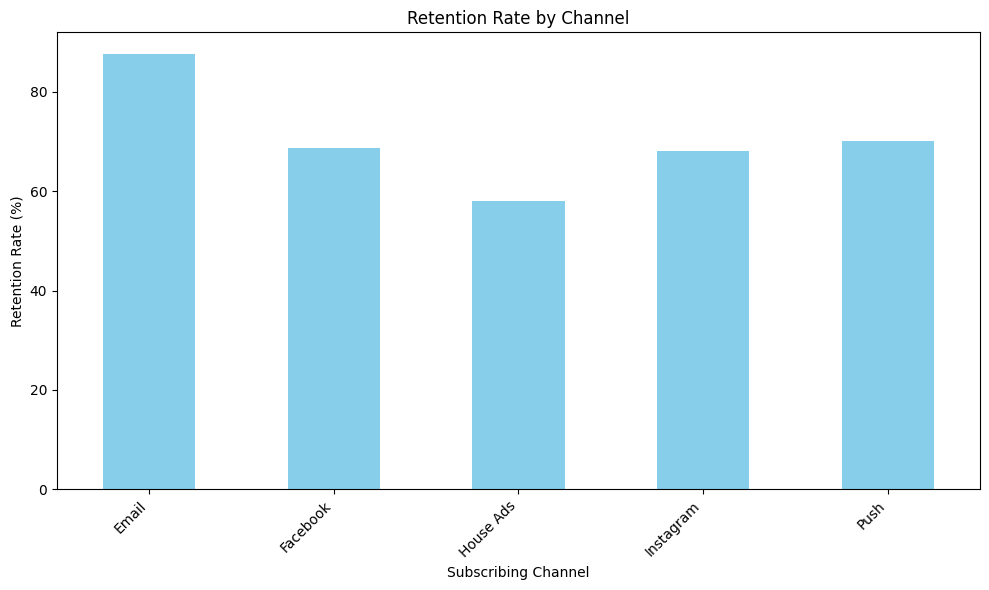

In [ ]:
# CALCULATING RETETENTION RATE BY SUBSCRIBING CHANNEL


# Group by subscribing_channel and calculate retention
retained = marketing_data[marketing_data['is_retained'] == True].groupby(['subscribing_channel'])['user_id'].nunique()

print('Retained')
print(retained)
print('\n')


# Group by subscribing_channel and calculate subscribers
subscribers = marketing_data[marketing_data['converted'] == True].groupby(['subscribing_channel'])['user_id'].nunique()

print('Subscribers')
print(subscribers)
print('\n')

# Calculate the retention rate across the DataFrame
channel_retention_rate = (retained/subscribers)*100

print('Channel Retention Rate')
print(channel_retention_rate)
print('\n')



# visualise channel retention rate

import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
channel_retention_rate.plot(kind='bar', color='skyblue')
plt.title('Retention Rate by Channel')
plt.xlabel('Subscribing Channel')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() #adjusts the plot parameters for a tight layout
plt.show()



Subscribers by Displayed Language
language_displayed
Arabic      12
English    926
German      53
Spanish     24
Name: user_id, dtype: int64


People Marketed to by Displayed Language
language_displayed
Arabic       24
English    7169
German       74
Spanish     120
Name: user_id, dtype: int64


Conversion Rate by Language
language_displayed
Arabic     50.000000
English    12.916725
German     71.621622
Spanish    20.000000
Name: user_id, dtype: float64




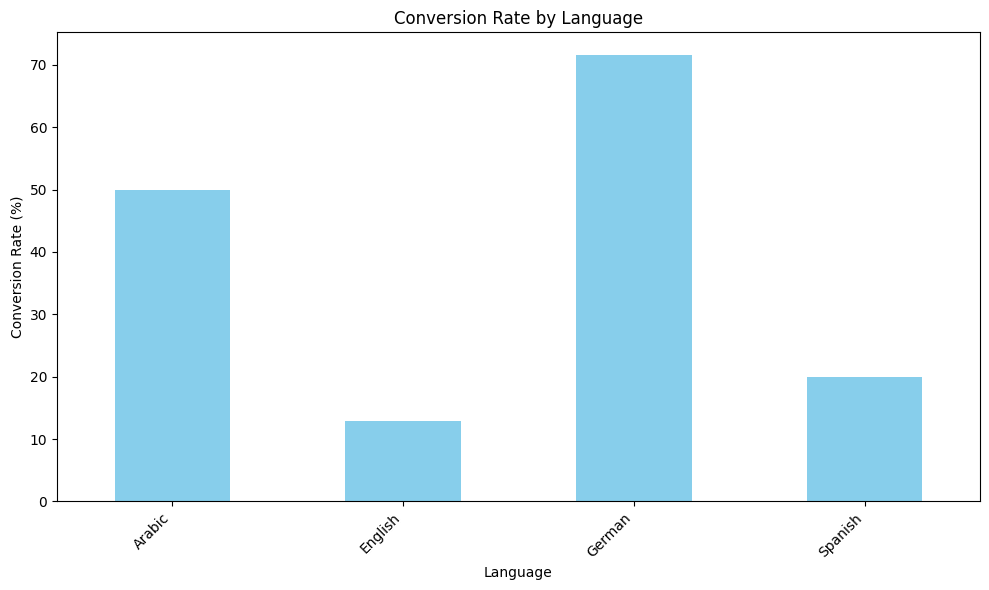

In [ ]:
# CALCULATING CONVERSION RATE BY LANGUAGE


# Group by language and calculate subscribers
preferred_language_subscribers = marketing_data[marketing_data['converted'] == True].groupby(['language_displayed'])['user_id'].nunique()

print('Subscribers by Displayed Language')
print(preferred_language_subscribers)
print('\n')

# Group by language and calculate people marketed to
preferred_language_marketed = marketing_data.groupby(['language_displayed'])['user_id'].nunique()

print('People Marketed to by Displayed Language')
print(preferred_language_marketed)
print('\n')

# Calculate the conversion rate across preferred languages
language_conversion_rate = (preferred_language_subscribers/preferred_language_marketed)*100

print('Conversion Rate by Language')
print(language_conversion_rate)
print('\n')



# visualise conversion rate by language

import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(10, 6))
language_conversion_rate.plot(kind='bar', color='skyblue')
plt.title('Conversion Rate by Language')
plt.xlabel('Language')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


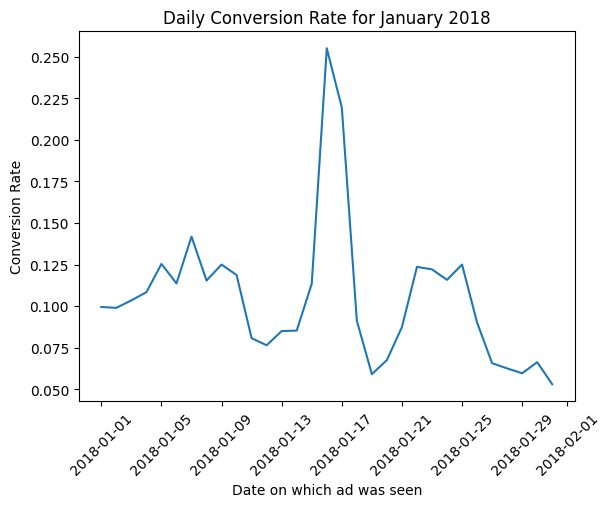

In [ ]:
# CONVERSION RATE BY DATE (to see if there is any difference in conversion rate based on when in the month users saw an ad)

# group by date_served and count unique users
total = marketing_data.groupby(['date_served'])['user_id'].nunique()

# group by date_served and count unique converted users
subscribers = marketing_data[marketing_data['converted']==True].groupby(['date_served'])['user_id'].nunique()

# calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)


plt.plot(daily_conversion_rate)

plt.title('Daily Conversion Rate for January 2018')
plt.xlabel('Date on which ad was seen')
plt.xticks(rotation=45)
plt.ylabel('Conversion Rate')
plt.show()

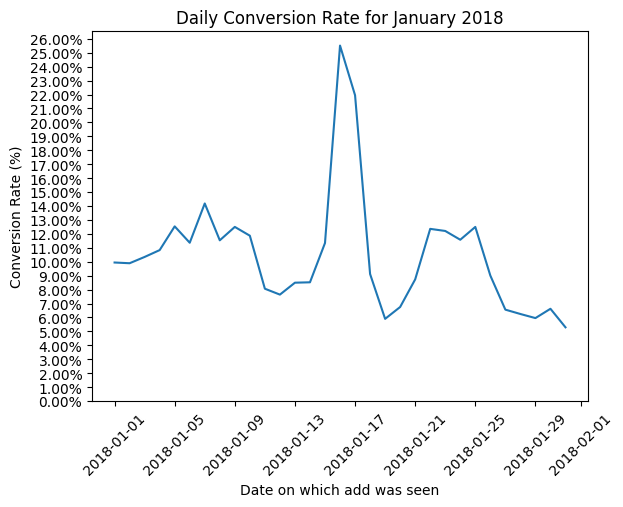

In [ ]:
# plot daily conversion rate

import matplotlib.pyplot as plt
import numpy as np
plt.plot(daily_conversion_rate)

plt.title('Daily Conversion Rate for January 2018')
plt.xlabel('Date on which add was seen')
plt.ylabel('Conversion Rate (%)') # Changed y-axis label
plt.yticks(np.arange(0, daily_conversion_rate.max() + 0.01, 0.01), [f'{x:.2%}' for x in np.arange(0, daily_conversion_rate.max() + 0.01, 0.01)]) # Format y-axis ticks as percentages
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()


date_subscribed
2018-01-01    0.777778
2018-01-02    0.702703
2018-01-03    0.729730
2018-01-04    0.500000
2018-01-05    0.575000
2018-01-06    0.756757
2018-01-07    0.526316
2018-01-08    0.638889
2018-01-09    0.675000
2018-01-10    0.682927
2018-01-11    0.615385
2018-01-12    0.391304
2018-01-13    0.500000
2018-01-14    0.615385
2018-01-15    0.714286
2018-01-16    0.701923
2018-01-17    0.616279
2018-01-18    0.733333
2018-01-19    0.684211
2018-01-20    0.809524
2018-01-21    0.761905
2018-01-22    0.772727
2018-01-23    0.714286
2018-01-24    0.652174
2018-01-25    0.565217
2018-01-26    0.800000
2018-01-27    0.571429
2018-01-28    0.666667
2018-01-29    0.750000
2018-01-30    0.714286
2018-01-31    0.666667
Name: user_id, dtype: float64


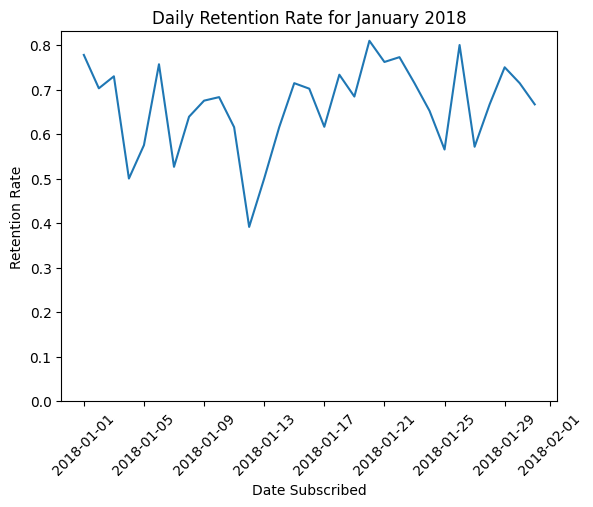

In [ ]:
# RETENTION RATE BY DATE (to see if there is any difference in retention rate based on when in the month users subscribed)

# group by date_subscribed and count unique users
total_subscribed = marketing_data.groupby(['date_subscribed'])['user_id'].nunique()

# group by date_subscribed and count retained users
total_retained = marketing_data[marketing_data['is_retained']==True].groupby(['date_subscribed'])['user_id'].nunique()

# calculate the retention rate per day
daily_retention_rate = total_retained/total_subscribed
print(daily_retention_rate)


plt.plot(daily_retention_rate)

plt.title('Daily Retention Rate for January 2018')
plt.xlabel('Date Subscribed')
plt.xticks(rotation=45)
plt.ylabel('Retention Rate')
plt.ylim(0)
plt.show()

language_preferred  age_group  
Arabic              0-18 years       19
                    19-24 years      26
                    24-30 years      19
                    30-36 years      19
                    36-45 years      19
                    45-55 years      21
                    55+ years        22
English             0-18 years     1421
                    19-24 years    1560
                    24-30 years    1442
                    30-36 years    1251
                    36-45 years    1260
                    45-55 years    1240
                    55+ years      1101
German              0-18 years       31
                    19-24 years      29
                    24-30 years      35
                    30-36 years      16
                    36-45 years      19
                    45-55 years      25
                    55+ years        12
Spanish             0-18 years       68
                    19-24 years      67
                    24-30 years      72
        

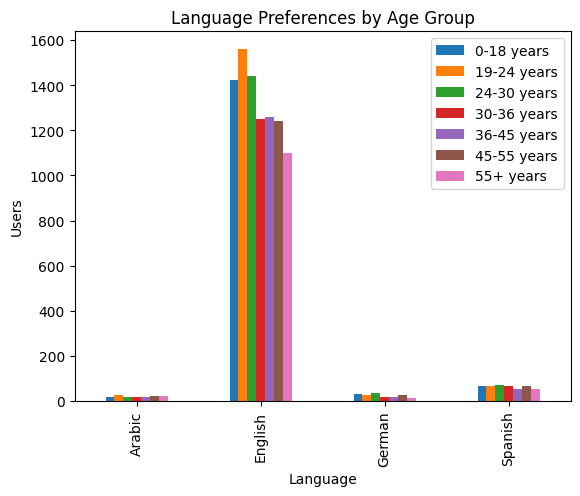

In [ ]:
# LOOKING AT LANGUAGE PREFERRED ACROSS DIFFERENT AGE GROUPS

age_by_language = marketing_data.groupby(['language_preferred','age_group'])['user_id'].count()

print(age_by_language)
print('\n')

#using the unstack method to transform data
age_by_language = pd.DataFrame(age_by_language.unstack(level=1))

print(age_by_language)
print('\n')


# plotting

age_by_language.plot(kind='bar')

plt.title('Language Preferences by Age Group')
plt.xlabel('Language')
plt.ylabel('Users')
plt.legend(loc = 'upper right', labels = age_by_language.columns.values)

plt.show()


marketing_channel  age_group  
Email              0-18 years      93
                   19-24 years    111
                   24-30 years    120
                   30-36 years     60
                   36-45 years     63
                   45-55 years     65
                   55+ years       53
Facebook           0-18 years     264
                   19-24 years    347
                   24-30 years    296
                   30-36 years    249
                   36-45 years    226
                   45-55 years    299
                   55+ years      179
House Ads          0-18 years     694
                   19-24 years    761
                   24-30 years    681
                   30-36 years    699
                   36-45 years    589
                   45-55 years    678
                   55+ years      631
Instagram          0-18 years     300
                   19-24 years    315
                   24-30 years    286
                   30-36 years    259
                   

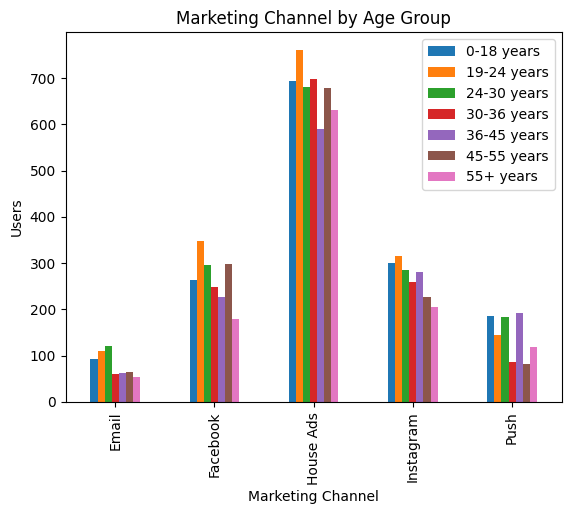

In [ ]:
# LOOKING AT MARKETING CHANNEL ACROSS DIFFERENT AGE GROUPS

marketing_channel_by_age = marketing_data.groupby(['marketing_channel','age_group'])['user_id'].count()

print(marketing_channel_by_age)
print('\n')

#using the unstack method to transform data
marketing_channel_by_age = pd.DataFrame(marketing_channel_by_age.unstack(level=1))

print(marketing_channel_by_age)
print('\n')


# plotting

marketing_channel_by_age.plot(kind='bar')

plt.title('Marketing Channel by Age Group')
plt.xlabel('Marketing Channel')
plt.ylabel('Users')
plt.legend(loc = 'upper right', labels = marketing_channel_by_age.columns.values)

plt.show()

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


subscribing_channel     Email  Facebook  House Ads  Instagram      Push
date_subscribed                                                        
2018-01-01           1.000000  0.875000   0.687500   0.750000  1.000000
2018-01-02           0.750000  1.000000   0.588235   0.625000  1.000000
2018-01-03                NaN  0.800000   0.647059   0.909091  0.666667
2018-01-04           0.500000  0.666667   0.466667   0.500000       NaN
2018

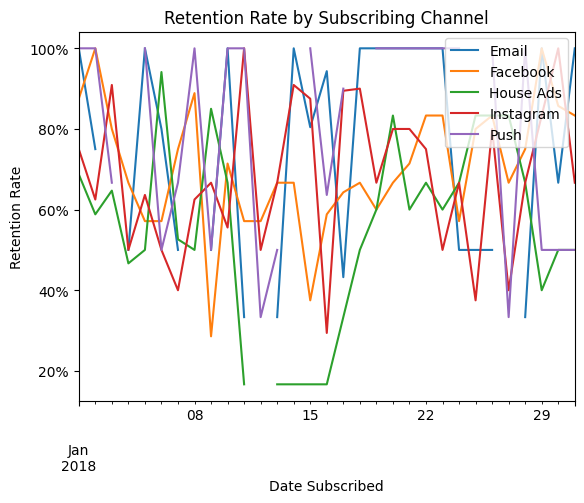

In [ ]:
# CHECKING RETENTION RATE BY SUBSCRIBING CHANNEL ACROSS THE MONTH

# Count the subcriptions by subscribing channel and day
subscribers_by_channel = marketing_data.groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()

# Print results
print(subscribers_by_channel.head())
print('\n')

# Sum the retained subcriptions by subscribing channel and date subscribed
retention_by_channel = marketing_data[marketing_data['is_retained']==True].groupby(['date_subscribed', 'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_by_channel.head())
print('\n')


# Divide retained subscribers by total subscribers
retention_rate_by_channel = retention_by_channel/subscribers_by_channel
retention_rate_by_channel = pd.DataFrame(retention_rate_by_channel.unstack(level=1))

print(retention_rate_by_channel)
print('\n')



# Plot retention rate
retention_rate_by_channel.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate')
plt.legend(loc='upper right', labels = retention_rate_by_channel.columns.values)

# Format the y-axis ticks as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.show()


# Conversion Attribution

###Conversion Rate by Marketing Channel

Subscribers by Marketing Channel
marketing_channel
Email        187
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


Users Marketed to by Marketing Channel
marketing_channel
Email         553
Facebook     1758
House Ads    3968
Instagram    1740
Push          972
Name: user_id, dtype: int64


Conversion Rate by Language
marketing_channel
Email        33.815552
Facebook     12.571104
House Ads     7.510081
Instagram    13.333333
Push          7.921811
Name: user_id, dtype: float64




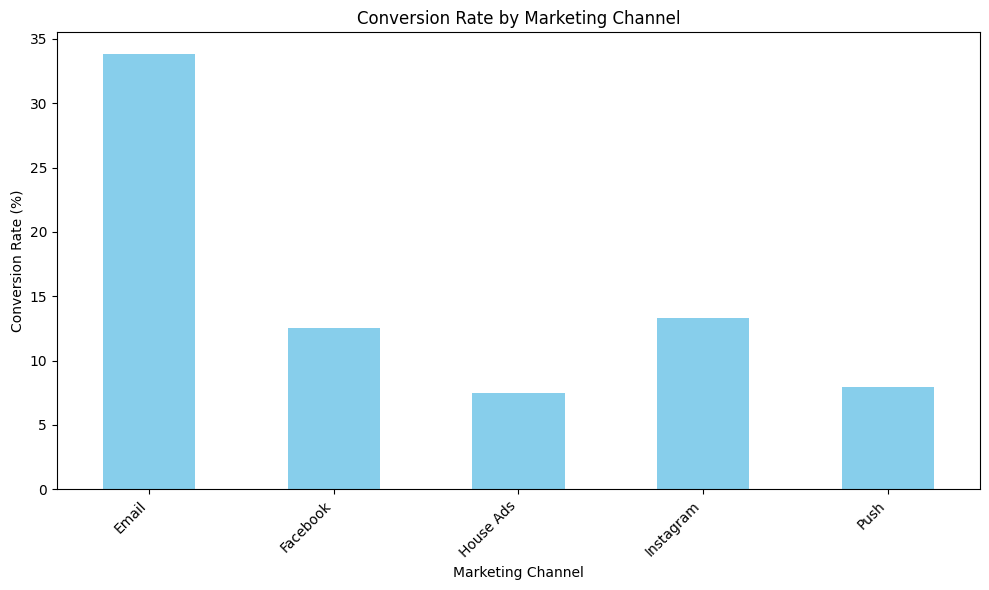

In [ ]:
# CALCULATING CONVERSION RATE BY MARKETING CHANNEL


# Group by English as preferred language and calculate subscribers
marketing_channel_subscribers = marketing_data[marketing_data['converted'] == True].groupby(['marketing_channel'])['user_id'].nunique()

print('Subscribers by Marketing Channel')
print(marketing_channel_subscribers)
print('\n')

# Group by marketing channel and calculate people marketed to
users_marketed = marketing_data.groupby(['marketing_channel'])['user_id'].nunique()

print('Users Marketed to by Marketing Channel')
print(users_marketed)
print('\n')

# Calculate the conversion rate across preferred languages
conversion_by_marketing_channel = (marketing_channel_subscribers/users_marketed)*100

print('Conversion Rate by Language')
print(conversion_by_marketing_channel)
print('\n')



# visualise conversion rate by language

import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(10, 6))
conversion_by_marketing_channel.plot(kind='bar', color='skyblue')
plt.title('Conversion Rate by Marketing Channel')
plt.xlabel('Marketing Channel')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


###Share of Marketing Channels in Conversions

1015


marketing_channel
Email        187
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


marketing_channel
Email        18.423645
Facebook     21.773399
House Ads    29.359606
Instagram    22.857143
Push          7.586207
Name: user_id, dtype: float64




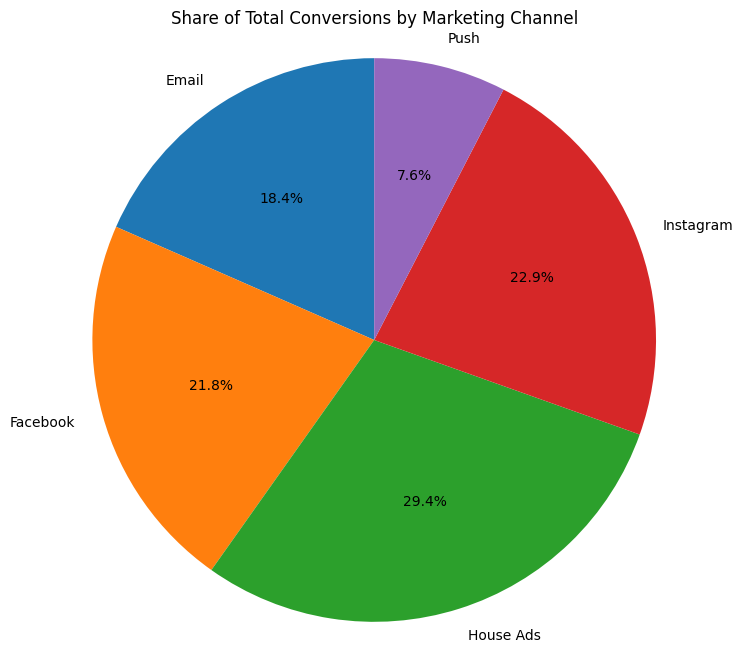

In [ ]:
# CALCULATING SHARE OF DIFFERENT CHANNEL IN TOTAL CONVERSIONS

total_conversions = marketing_data[marketing_data['converted'] == True]['user_id'].nunique()

print(total_conversions)
print('\n')

# Group by marketing_channel and calculate subscribers

conversions_by_marketing_channel = marketing_data[marketing_data['converted'] == True].groupby(['marketing_channel'])['user_id'].nunique()

print(conversions_by_marketing_channel)
print('\n')

# conversion rate

conversion_rate_by_marketing_channel = (conversions_by_marketing_channel/total_conversions)*100

print(conversion_rate_by_marketing_channel)
print('\n')

# pie chart for conversions_by_subscribing_channel

import matplotlib.pyplot as plt


# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(conversion_rate_by_marketing_channel, labels=conversion_rate_by_marketing_channel.index, autopct='%1.1f%%', startangle=90)
plt.title('Share of Total Conversions by Marketing Channel')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
#MINOR DATA DISCREPANCY?

'''
for converted users

distribution by marketing chanel should be identical to distribution by subscribing channel?

'''

'\nfor converted users\n\ndistribution by marketing chanel should be identical to distribution by subscribing channel?\n\n'

In [ ]:
#DEFINING A FUNCTION TO AUTOMATE CONVERSION RATE CALCULATION

def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()

    # Conversion rate
    conversion_rate = column_conv/column_total

    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

###Daily Conversion Rate by Age Group

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


age_group    0-18 years  19-24 years  24-30 years  30-36 years  36-45 years  \
date_served                                                                   
2018-01-01     0.155172     0.196721     0.105263     0.040816     0.042553   
2018-01-02     0.180328     0.164384     0.114754     0.040000     0.043478   
2018-01-03     0.102041     0.208955     0.150943     0.042553     0.060000   
2018-01-04     0.117647     0.200000     0.183673     0.045455     0.043478   
2018-01-05     0.142857     0.250000     0.136364

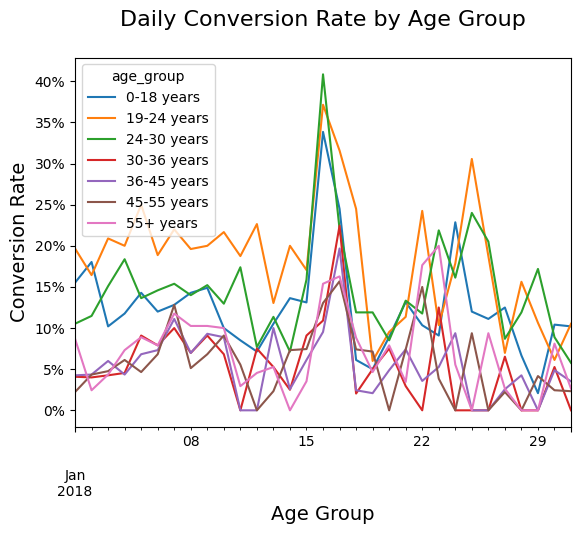

In [ ]:
#CONVERSION RATE BY AGE GROUP

# Calculate conversion rate by age_group
conversion_by_age = conversion_rate(marketing_data,['date_served', 'age_group'])
print(conversion_by_age)
print('\n')

# Unstack and create a DataFrame
conversion_by_age = pd.DataFrame(conversion_by_age.unstack(level=1))

print(conversion_by_age)
print('\n')

# Visualize conversion by age_group
conversion_by_age.plot()
plt.title('Daily Conversion Rate by Age Group\n', size = 16)
plt.ylabel('Conversion Rate', size = 14)
plt.xlabel('Age Group', size = 14)

# Format the y-axis ticks as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.show()



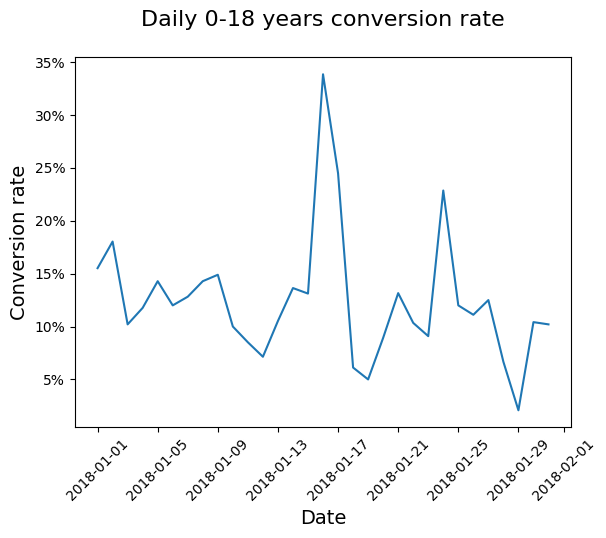

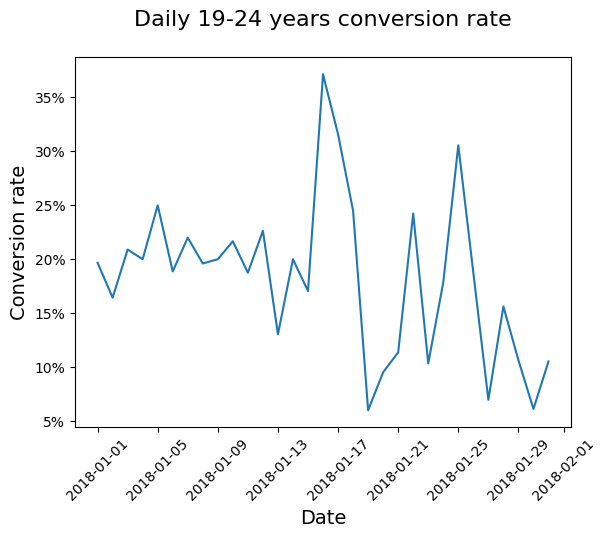

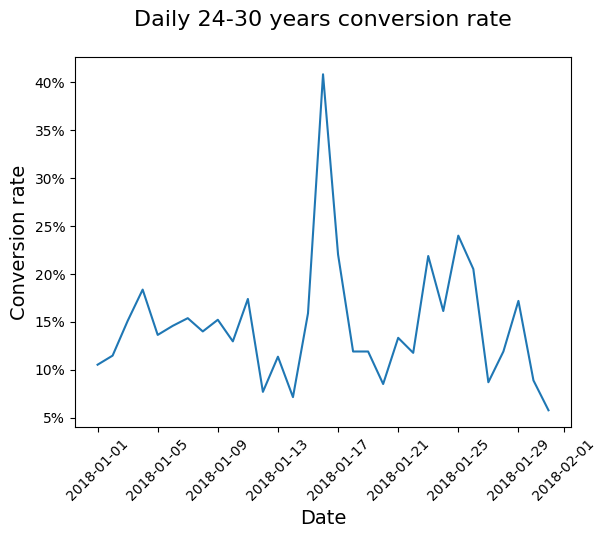

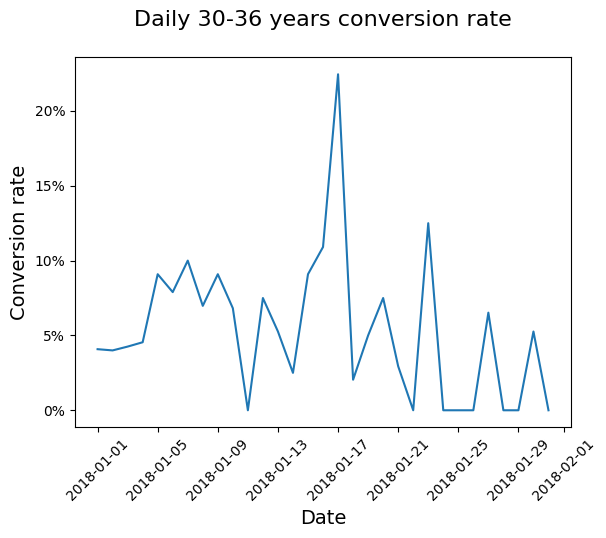

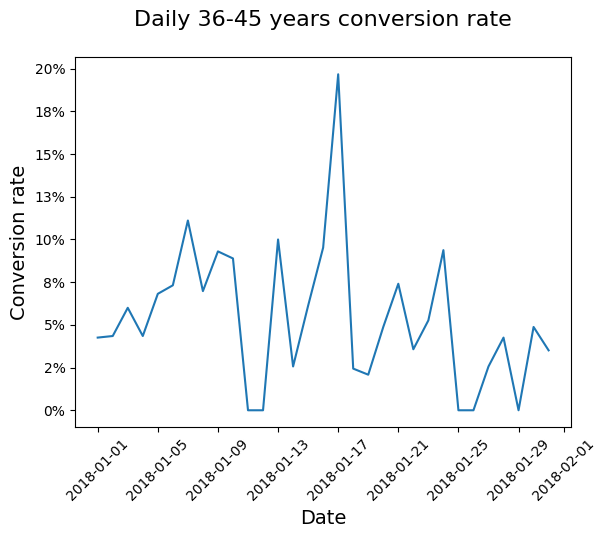

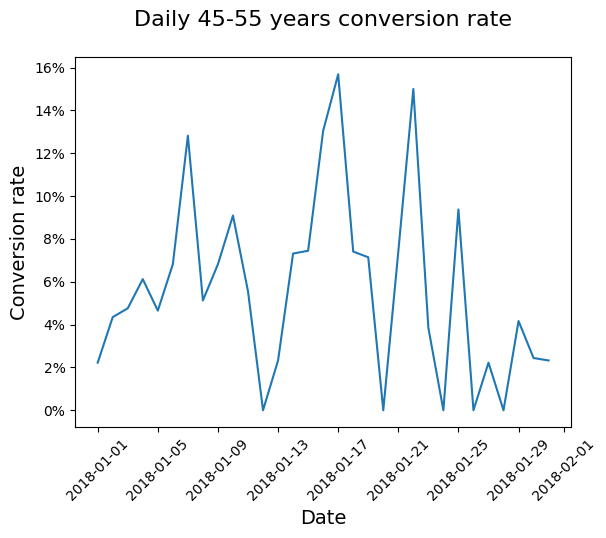

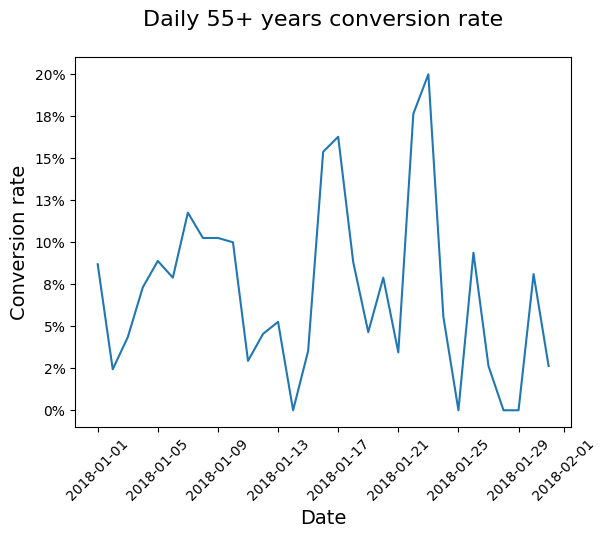

<Figure size 640x480 with 0 Axes>

In [ ]:
# PLOTTING DAILY CONVERSION RATE FOR EACH AGE GROUP INDIVIDUALLY

#specifying plotting function
def plotting_conv(dataframe):

  for column in dataframe:
    # Plot column by dataframe's index
    plt.plot(dataframe.index, dataframe[column])
    plt.title('Daily ' + str(column) + ' conversion rate\n',
                  size = 16)
    plt.ylabel('Conversion rate', size = 14)
    plt.xlabel('Date', size = 14)
    plt.xticks(rotation = 45)

    # Format the y-axis ticks as percentages
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

    # Show plot
    plt.show()
    plt.clf()


# plotting

plotting_conv(conversion_by_age)

###Daily Conversion Rate by Marketing Channel

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
                                    ...   
2018-01-31   Email                1.000000
             Facebook             0.078947
             House Ads            0.038217
             Instagram            0.041096
             Push                 0.052632
Name: user_id, Length: 155, dtype: float64


marketing_channel     Email  Facebook  House Ads  Instagram      Push
date_served                                                          
2018-01-01         1.000000  0.117647   0.084656   0.106667  0.083333
2018-01-02         1.000000  0.098361   0.077982   0.129032  0.055556
2018-01-03         0.000000  0.080645   0.088542   0.171875  0.083333
2018-01-04         0.500000  0.138462   0.089820   0.126984  0.058824
2018-01-05         1.000000  0.

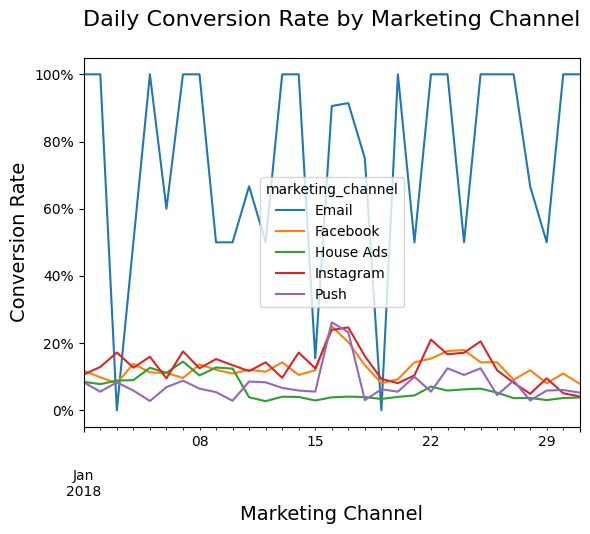

In [ ]:
#CONVERSION RATE BY MARKETING CHANNEL

# Calculate conversion rate by marketing_channel
conversion_by_marketing_channel = conversion_rate(marketing_data,['date_served', 'marketing_channel'])
print(conversion_by_marketing_channel)
print('\n')

# Unstack and create a DataFrame
conversion_by_marketing_channel = pd.DataFrame(conversion_by_marketing_channel.unstack(level=1))

print(conversion_by_marketing_channel)
print('\n')

# Visualize conversion by age_group
conversion_by_marketing_channel.plot()
plt.title('Daily Conversion Rate by Marketing Channel\n', size = 16)
plt.ylabel('Conversion Rate', size = 14)
plt.xlabel('Marketing Channel', size = 14)

# Format the y-axis ticks as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.show()

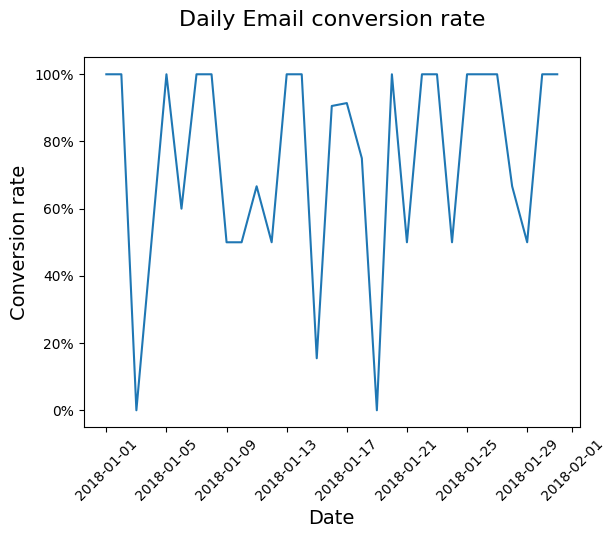

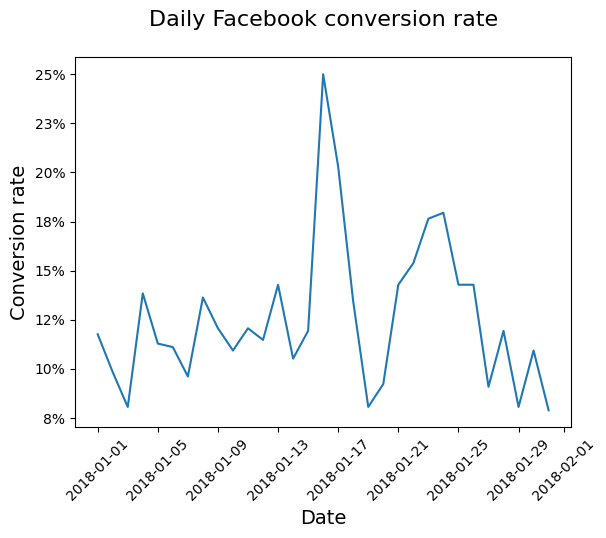

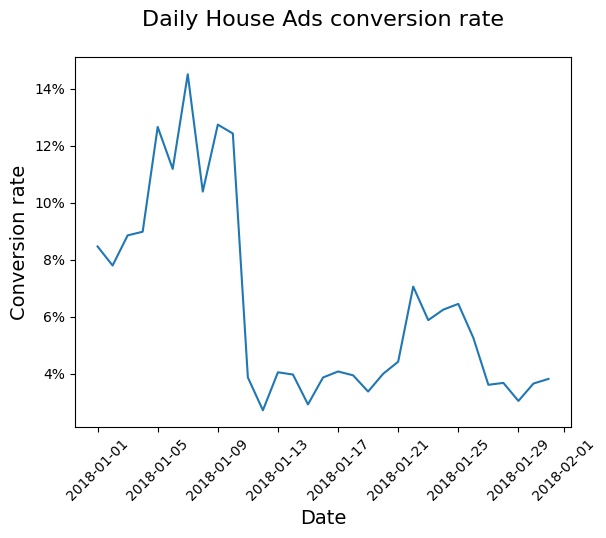

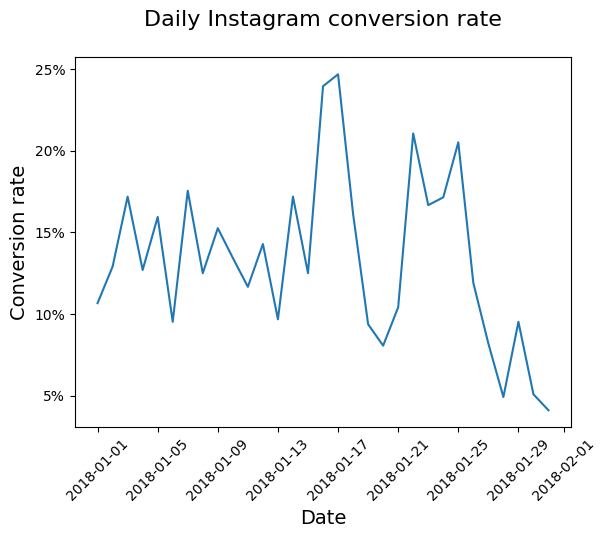

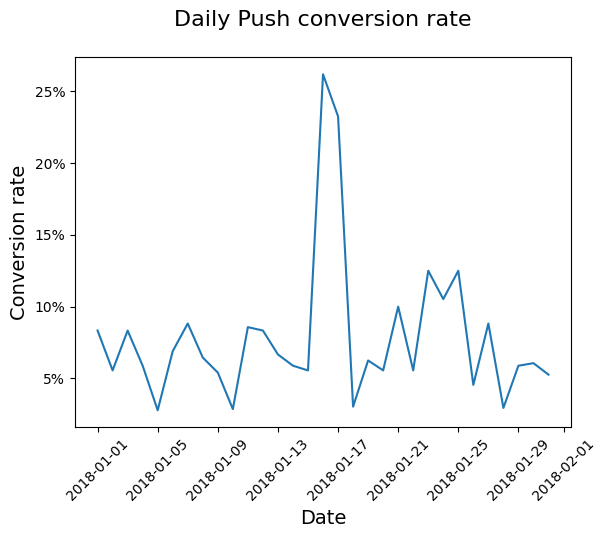

<Figure size 640x480 with 0 Axes>

In [ ]:
#PLOTTING DAILY CONVERSION RATE FOR INDIVIDUAL MARKETING CHANNELS


plotting_conv(conversion_by_marketing_channel)

We notice a sharp decline in conversion rate for House Ads around 11th January 2018. Furthermore, after the sharp drop, it stays down for the remainder of January. This is worth further investigation.

###Investigating House Ads Conversion Rate

First, we check whether users are more likely to convert on weekends compared with weekdays and determine if that could be the cause for the changing house ads conversion rate.

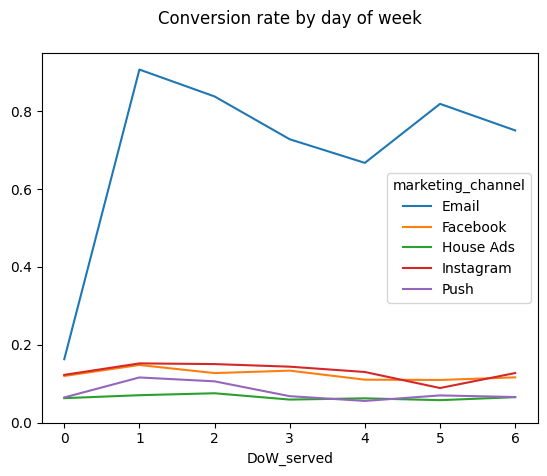

In [ ]:



# Add day of week column to the dataset
marketing_data['DoW_served'] = marketing_data['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing_data, ['DoW_served', 'marketing_channel'])


# Unstack channels
DoW_conversion = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_conversion.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)

plt.show()


Therefore House Ads appear to be stable across the week. Now, we check the role of language in the performance of House Ads.

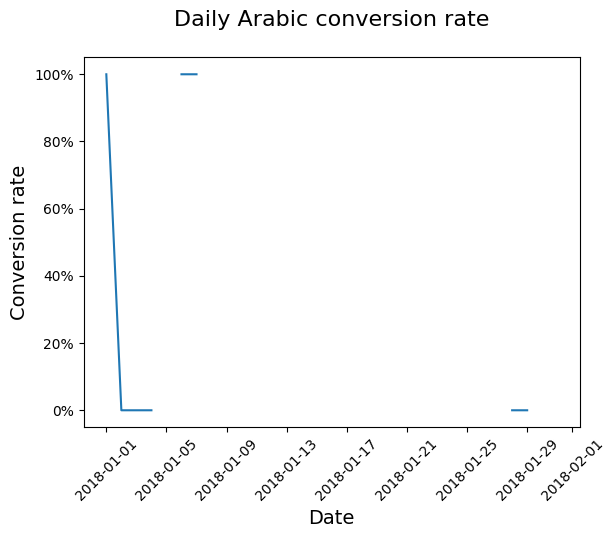

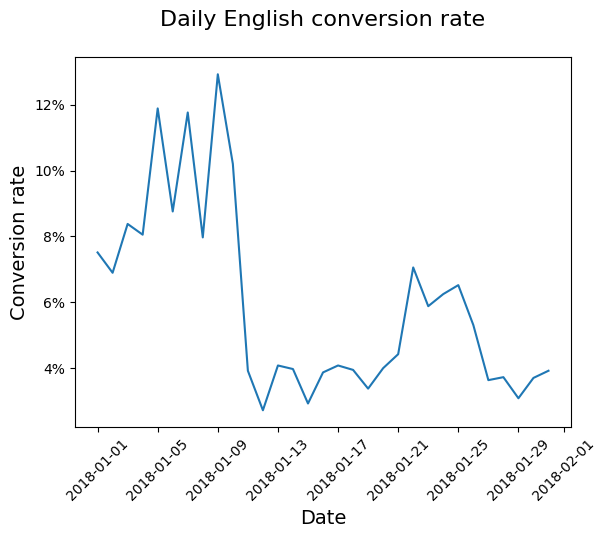

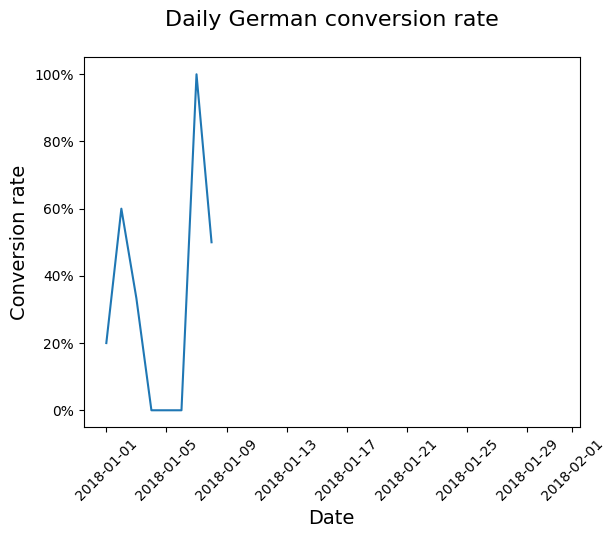

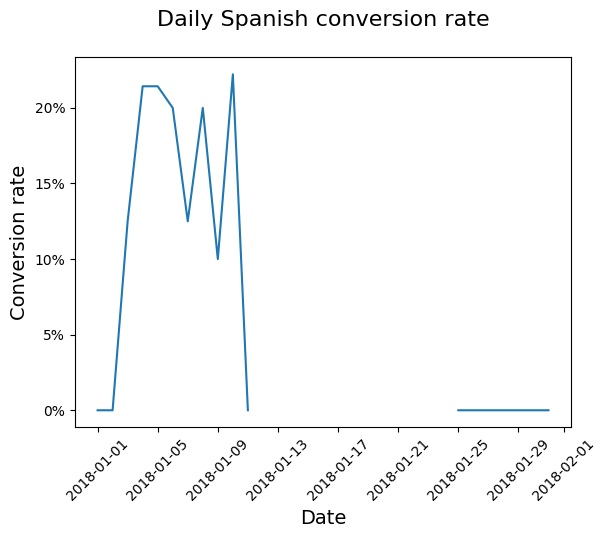

<Figure size 640x480 with 0 Axes>

In [ ]:
#PLOTTING DAILY HOUSE ADS CONVERSION RATE BY LANGUAGE

# Isolate the rows where marketing channel is House Ads
house_ads = marketing_data[marketing_data['marketing_channel']=='House Ads']

# Calculate conversion by date served, and language displayed
HA_conversion_rate_by_language = conversion_rate(house_ads,['date_served','language_displayed'])

# Unstack conv_lang_channel
HA_conversion_rate_by_language = pd.DataFrame(HA_conversion_rate_by_language.unstack(level=1))

# Use the plotting function to display results
plotting_conv(HA_conversion_rate_by_language)

This suggests that there are insufficient House Ads in languages other than English from around 10th Jan 2018.

language_displayed  Arabic  English  German  Spanish
date_served                                         
2018-01-01             2.0    173.0     5.0      9.0
2018-01-02             3.0    203.0     5.0      8.0
2018-01-03             2.0    179.0     3.0      8.0
2018-01-04             2.0    149.0     2.0     14.0
2018-01-05             NaN    143.0     1.0     14.0
2018-01-06             3.0    137.0     2.0     10.0
2018-01-07             2.0    119.0     2.0      8.0
2018-01-08             NaN    138.0     6.0     10.0
2018-01-09             NaN    147.0     NaN     10.0
2018-01-10             NaN    147.0     4.0     18.0
2018-01-11             NaN    153.0     NaN      2.0
2018-01-12             NaN    147.0     NaN      NaN
2018-01-13             NaN    147.0     NaN      1.0
2018-01-14             NaN    151.0     NaN      NaN
2018-01-15             NaN    205.0     NaN      NaN
2018-01-16             NaN    155.0     NaN      NaN
2018-01-17             NaN    147.0     NaN   

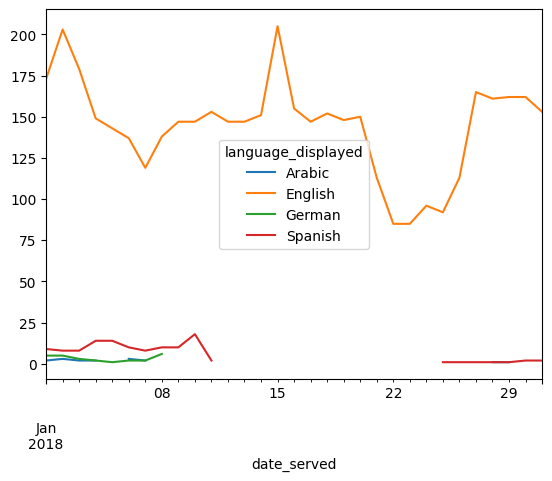

language_preferred  Arabic  English  German  Spanish
date_served                                         
2018-01-01             2.0    171.0     5.0     11.0
2018-01-02             3.0    200.0     5.0     10.0
2018-01-03             2.0    179.0     3.0      8.0
2018-01-04             2.0    149.0     2.0     14.0
2018-01-05             NaN    143.0     1.0     14.0
2018-01-06             3.0    136.0     2.0     11.0
2018-01-07             2.0    117.0     2.0     10.0
2018-01-08             NaN    138.0     6.0     10.0
2018-01-09             NaN    147.0     NaN     10.0
2018-01-10             NaN    147.0     4.0     18.0
2018-01-11             7.0    133.0     2.0     13.0
2018-01-12             3.0    129.0     4.0     11.0
2018-01-13             6.0    121.0     5.0     16.0
2018-01-14             5.0    131.0     3.0     12.0
2018-01-15             2.0    189.0     4.0     10.0
2018-01-16             7.0    127.0     4.0     17.0
2018-01-17             2.0    126.0     3.0   

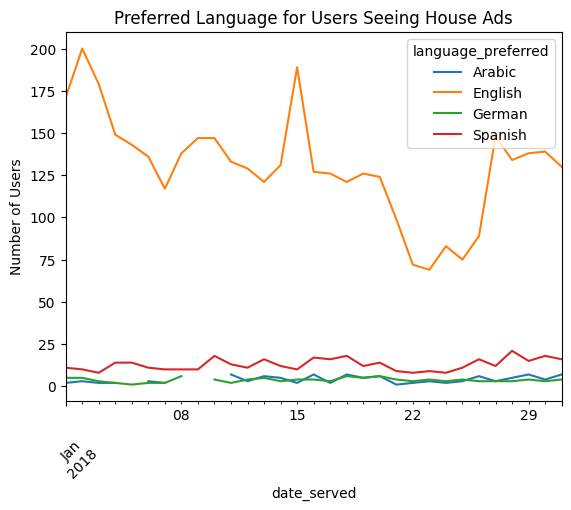

In [ ]:
# CHECKING DISPLAY LANGUAGE & PREFERRED LANGUAGE OF DAILY HOUSE ADS

# Isolate the rows where marketing channel is House Ads
house_ads = marketing_data[marketing_data['marketing_channel']=='House Ads']

# Grouping by date_served & language displayed
HA_displayed_by_langauge = house_ads.groupby(['date_served','language_displayed'])['user_id'].nunique()

HA_displayed_by_langauge = pd.DataFrame(HA_displayed_by_langauge.unstack(level=1))

print(HA_displayed_by_langauge)
print('\n')

HA_displayed_by_langauge.plot()
plt.show()

# Use the plotting function to display results
#plotting_conv(HA_conversion_rate_by_language)



#plotting language preferred for users shown house ads


# Grouping by date_served & language preferred
HA_preferred_by_langauge = house_ads.groupby(['date_served','language_preferred'])['user_id'].nunique()

HA_preferred_by_langauge = pd.DataFrame(HA_preferred_by_langauge.unstack(level=1))

print(HA_preferred_by_langauge)
print('\n')

HA_preferred_by_langauge.plot()
plt.title(f'Preferred Language for Users Seeing House Ads')

plt.ylabel(f'Number of Users')
plt.xticks(rotation=45)
plt.show()

print('\n')


language_displayed  English  Spanish
date_served                         
2018-01-01            171.0      NaN
2018-01-02            200.0      NaN
2018-01-03            179.0      NaN
2018-01-04            149.0      NaN
2018-01-05            143.0      NaN
2018-01-06            136.0      NaN
2018-01-07            117.0      NaN
2018-01-08            138.0      NaN
2018-01-09            147.0      NaN
2018-01-10            147.0      NaN
2018-01-11            133.0      NaN
2018-01-12            129.0      NaN
2018-01-13            121.0      NaN
2018-01-14            131.0      NaN
2018-01-15            189.0      NaN
2018-01-16            127.0      NaN
2018-01-17            126.0      NaN
2018-01-18            121.0      NaN
2018-01-19            126.0      NaN
2018-01-20            124.0      NaN
2018-01-21             99.0      NaN
2018-01-22             72.0      NaN
2018-01-23             69.0      NaN
2018-01-24             83.0      NaN
2018-01-25             74.0      1.0
2

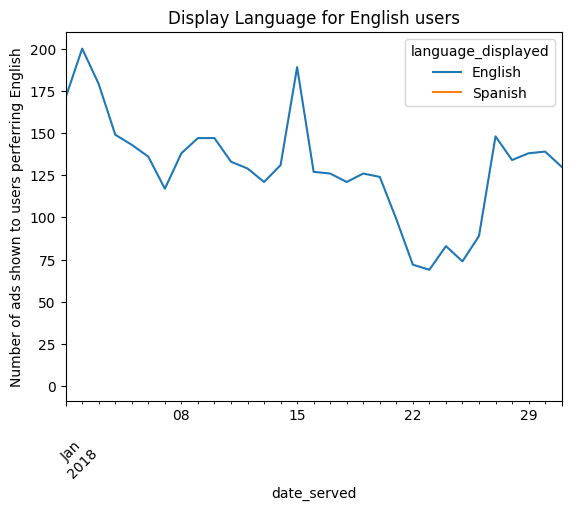

language_displayed  English  Spanish
date_served                         
2018-01-01              2.0      9.0
2018-01-02              2.0      8.0
2018-01-03              NaN      8.0
2018-01-04              NaN     14.0
2018-01-05              NaN     14.0
2018-01-06              1.0     10.0
2018-01-07              2.0      8.0
2018-01-08              NaN     10.0
2018-01-09              NaN     10.0
2018-01-10              NaN     18.0
2018-01-11             11.0      2.0
2018-01-12             11.0      NaN
2018-01-13             15.0      1.0
2018-01-14             12.0      NaN
2018-01-15             10.0      NaN
2018-01-16             17.0      NaN
2018-01-17             16.0      NaN
2018-01-18             18.0      NaN
2018-01-19             12.0      NaN
2018-01-20             14.0      NaN
2018-01-21              9.0      NaN
2018-01-22              8.0      NaN
2018-01-23              9.0      NaN
2018-01-24              8.0      NaN
2018-01-25             11.0      NaN
2

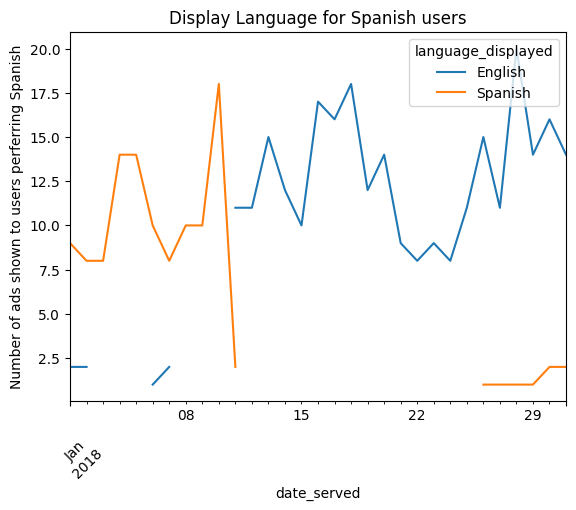

language_displayed  Arabic  English
date_served                        
2018-01-01             2.0      NaN
2018-01-02             3.0      NaN
2018-01-03             2.0      NaN
2018-01-04             2.0      NaN
2018-01-06             3.0      NaN
2018-01-07             2.0      NaN
2018-01-11             NaN      7.0
2018-01-12             NaN      3.0
2018-01-13             NaN      6.0
2018-01-14             NaN      5.0
2018-01-15             NaN      2.0
2018-01-16             NaN      7.0
2018-01-17             NaN      2.0
2018-01-18             NaN      7.0
2018-01-19             NaN      5.0
2018-01-20             NaN      6.0
2018-01-21             NaN      1.0
2018-01-22             NaN      2.0
2018-01-23             NaN      3.0
2018-01-24             NaN      2.0
2018-01-25             NaN      3.0
2018-01-26             NaN      6.0
2018-01-27             NaN      3.0
2018-01-28             1.0      4.0
2018-01-29             1.0      6.0
2018-01-30             NaN  

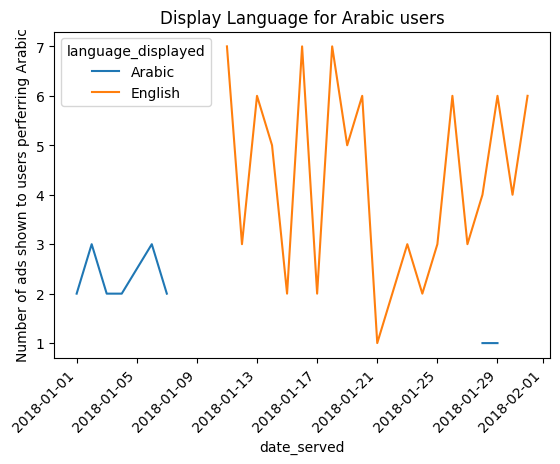

language_displayed  English  German
date_served                        
2018-01-01              NaN     5.0
2018-01-02              1.0     5.0
2018-01-03              NaN     3.0
2018-01-04              NaN     2.0
2018-01-05              NaN     1.0
2018-01-06              NaN     2.0
2018-01-07              NaN     2.0
2018-01-08              NaN     6.0
2018-01-10              NaN     4.0
2018-01-11              2.0     NaN
2018-01-12              4.0     NaN
2018-01-13              5.0     NaN
2018-01-14              3.0     NaN
2018-01-15              4.0     NaN
2018-01-16              4.0     NaN
2018-01-17              3.0     NaN
2018-01-18              6.0     NaN
2018-01-19              5.0     NaN
2018-01-20              6.0     NaN
2018-01-21              4.0     NaN
2018-01-22              3.0     NaN
2018-01-23              4.0     NaN
2018-01-24              3.0     NaN
2018-01-25              4.0     NaN
2018-01-26              3.0     NaN
2018-01-27              3.0 

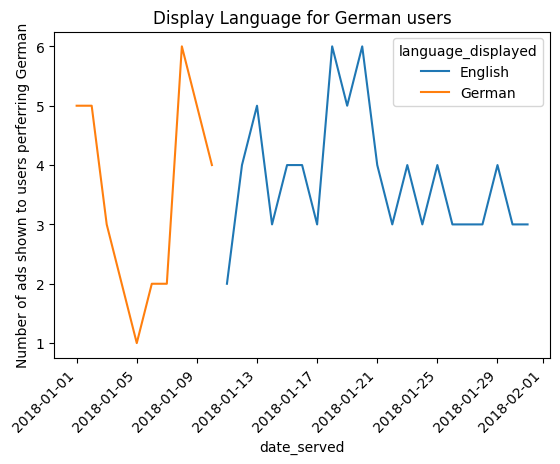

In [ ]:
# CHECKING DISPLAY LANGUAGE OF DAILY HOUSE ADS FOR EACH PREFERRED LANGUAGE

# Isolate the rows where marketing channel is House Ads
house_ads = marketing_data[marketing_data['marketing_channel']=='House Ads']


langs = ['English','Spanish','Arabic','German']

for lang_pref in langs:

  # Grouping by date_served & language displayed
  HA_displayed_and_preferred_by_langauge = house_ads[house_ads['language_preferred']==lang_pref].groupby(['date_served','language_displayed'])['user_id'].nunique()

  HA_displayed_and_preferred_by_langauge = pd.DataFrame(HA_displayed_and_preferred_by_langauge.unstack(level=1))

  print(HA_displayed_and_preferred_by_langauge)
  print('\n')

  HA_displayed_and_preferred_by_langauge.plot()
  plt.title(f'Display Language for {lang_pref} users')

  plt.ylabel(f'Number of ads shown to users perferring {lang_pref}')
  plt.xticks(rotation=45)
  plt.show()

#Use the plotting function to display results
#plotting_conv(HA_conversion_rate_by_language)



The above plots clearly shows that House Ads in Arabic, German and Spanish are either very low or completely absent after 10th January 2018, whereas there are still users who have these as their preferred languages.

This is probably why House Ads drop so sharply after 10th January. Let us also compare language_preferred and language_displayed for House Ads to be more sure of our reasoning.

<ipython-input-101-a2e893d6d74b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(house_ads['language_displayed'] == house_ads['language_preferred'], 'Yes', 'No')


is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0




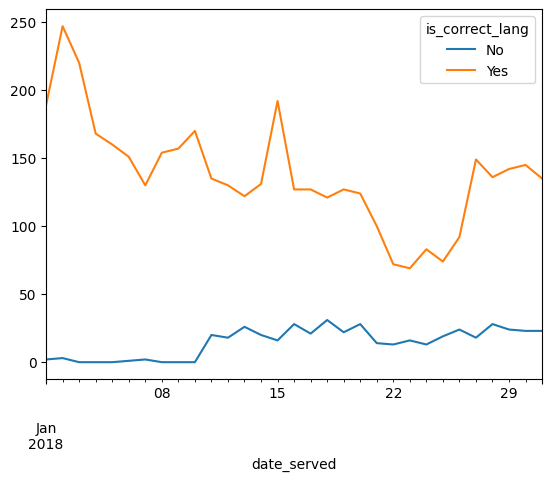

In [ ]:
# CHECKING LANGUAGE PREFERRED VS LANGUAGE DISPLAYED

# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(house_ads['language_displayed'] == house_ads['language_preferred'], 'Yes', 'No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served','is_correct_lang'])['user_id'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)


# Print results
print(language_check_df)
print('\n')

language_check_df.plot()
plt.show()

We can detect a clear uptick in incorrect language ads, and a downward trend in correct language ads starting 10th January. Let's take a look at what percentage of users are receiving ads in the correct language.

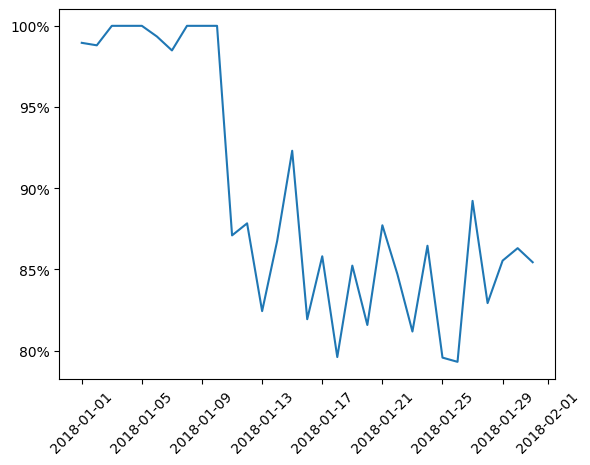

In [ ]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.xticks(rotation = 45)

# Format the y-axis ticks as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.show()

This confirms our suspicion that a language mismatch is closely correlated with the drop in House Ads conversion.

###Assessing Impact of Language Mismatch for House Ads

Now that we've determined that language is, in fact, the issue with House Ads conversion, we need to know how many subscribers they lost as a result of this bug.

One approach can be to index non-English preferring user conversion rates against English preferring user conversion rates in the time period before the language bug arose, and use that index to estimate lost subscribers after 10th January 2018.

In [ ]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
pref_lang_conv_rate = conversion_rate(house_ads_bug,['language_preferred'])

print(pref_lang_conv_rate)
print('\n')

# Index other language conversion rate against English
spanish_index = pref_lang_conv_rate['Spanish']/pref_lang_conv_rate['English']
arabic_index = pref_lang_conv_rate['Arabic']/pref_lang_conv_rate['English']
german_index = pref_lang_conv_rate['German']/pref_lang_conv_rate['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

language_preferred
Arabic     0.500000
English    0.099649
German     0.444444
Spanish    0.155963
Name: user_id, dtype: float64


Spanish index: 1.5651246931128053
Arabic index: 5.017605633802817
German index: 4.460093896713615


In [ ]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 'language_preferred']).agg({'user_id':'nunique','converted':'sum'})

# Unstack converted
converted = pd.DataFrame(converted.unstack(level=1))

print(converted)
print('\n')

actual_english_conv = converted['converted','English'].sum()
print(f'actual english subs = {actual_english_conv}\n')


                   user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   
2018-01-06             3.0   136.0    2.0    11.0         3      12      0   
2018-01-07             2.0   117.0    2.0    10.0         2      14      2   
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3   
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN   
2018-01-10             NaN   147.0    4.0    18.0       NaN     

In [ ]:
# Create English conversion rate column for affected period
converted['english_conv_rate'] = converted.loc['2018-01-11':'2018-01-31'][('converted','English')]/converted.loc['2018-01-11':'2018-01-31'][('user_id','English')]

# Create expected conversion rates for each language
converted['expected_spanish_rate'] = converted['english_conv_rate']*spanish_index
converted['expected_arabic_rate'] = converted['english_conv_rate']*arabic_index
converted['expected_german_rate'] = converted['english_conv_rate']*german_index

# Multiply number of users by the expected conversion rate
converted['expected_spanish_conv'] = converted['expected_spanish_rate']*converted[('user_id','Spanish')]
converted['expected_arabic_conv'] = converted['expected_arabic_rate']*converted[('user_id','Arabic')]
converted['expected_german_conv'] = converted['expected_german_rate']*converted[('user_id','German')]

print(spanish_index)
print(german_index)
print(arabic_index)

print(converted)

1.5651246931128053
4.460093896713615
5.017605633802817
                   user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0         2      13      1   
2018-01-02             3.0   200.0    5.0    10.0         0      14      3   
2018-01-03             2.0   179.0    3.0     8.0         0      15      1   
2018-01-04             2.0   149.0    2.0    14.0         0      12      0   
2018-01-05             NaN   143.0    1.0    14.0       NaN      17  False   
2018-01-06             3.0   136.0    2.0    11.0         3      12      0   
2018-01-07             2.0   117.0    2.0    10.0         2      14      2   
2018-01-08             NaN   138.0    6.0    10.0       NaN      11      3   
2018-01-09             NaN   147.0    NaN    10.0       NaN      19    NaN   
2018-01-1

In [ ]:
# Use .loc to slice only the relevant dates
converted = converted.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_spanish_subs = converted['expected_spanish_conv'].sum()
expected_arabic_subs = converted['expected_arabic_conv'].sum()
expected_german_subs = converted['expected_german_conv'].sum()

print(f'expected spanish subs from 11th Jan = {expected_spanish_subs}')
print(f'expected arabic subs from 11th Jan = {expected_arabic_subs}')
print(f'expected german subs from 11th Jan = {expected_german_subs}\n')


expected_subs = expected_spanish_subs + expected_arabic_subs + expected_german_subs
print(f'total expected non-English subs from 11th Jan = {expected_subs}\n')


# Calculate how many subscribers we actually got
actual_subs = converted[('converted','Spanish')].sum() + converted[('converted','Arabic')].sum() + converted[('converted','German')].sum()
print(f'actual non-English subs from 11th Jan = {actual_subs}')
print(f'actual English subs from 11th Jan = {converted["converted","English"].sum()}')

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(f'lost non-English subs = {lost_subs}\n')


print(f'In percentage terms, had the language mismatch been corrected, we would have seen a \
{round((((expected_subs+94)/(actual_subs+94))*100)-100, 2)}% increase in subscriber numbers after 10th January 2018.')



expected spanish subs from 11th Jan = 16.78880411601334
expected arabic subs from 11th Jan = 18.04446335323397
expected german subs from 11th Jan = 14.190363450269498

total expected non-English subs from 11th Jan = 49.023630919516805

actual non-English subs from 11th Jan = 26
actual English subs from 11th Jan = 94
lost non-English subs = 23.023630919516805

In percentage terms, had the language mismatch been corrected, we would have seen a 19.19% increase in subscriber numbers after 10th January 2018.


####Therefore, correcting the language mismatch would have most likely **increased subscriptions by 20%** after 10th January 2018.

# A/B Test for Personalization

A/B Testing - refers to a randomised experiment that helps determine which variant of a feature/intervention performs better.

An A/B test was run where approximately half the emails were generic promotions, while the other half contained personalised messaging around individual site usage.

###Test Allocation

We need to check to ensure that users were allocated approximately equally among the treatment and control groups.

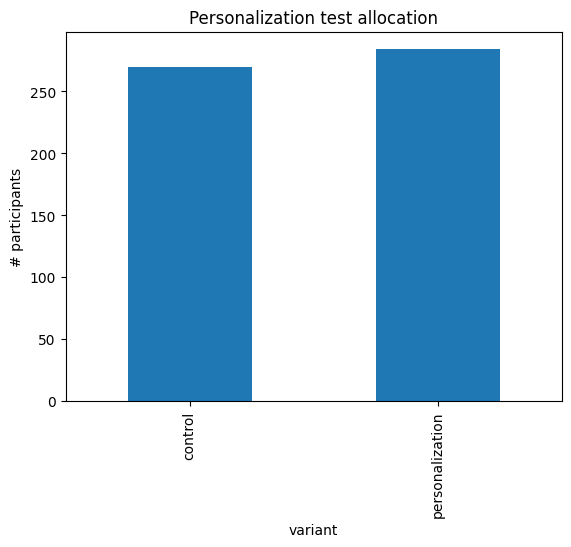

In [ ]:
# Subset the DataFrame
email = marketing_data[marketing_data['marketing_channel']=='Email']

# Group the email DataFrame by variant
alloc = email.groupby(['variant'])['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind = 'bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

###Treatment Performance Compared to Control

In [ ]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id','variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1))

#print(subscribers_df)

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print(control)
#print(personalization)

print('Control conversion rate:',np.mean(control))
print('Personalization conversion rate:',np.mean(personalization))


user_id
a100000687    False
a100000688     True
a100000689     True
a100000690     True
a100000691     True
              ...  
a100007288     True
a100007289     True
a100007290     True
a100007291     True
a100007293     True
Name: control, Length: 270, dtype: object
Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


We can calculate LIFT as:

<br>

(treatment conversion rate - control conversion rate) / control conversion rate





In [ ]:
def lift(a,b):

  '''
  a - treatment group
  b - control group
  '''
  # Calcuate the mean of a and b
  a_mean = np.mean(a)
  b_mean = np.mean(b)

  # Calculate the lift using a_mean and b_mean
  lift = ((a_mean-b_mean)/b_mean)*100

  return lift


print(f"There is a {round(lift(personalization,control),2)}% increase in conversion rate for the treatment group. ")

There is a 38.85% increase in conversion rate for the treatment group. 


###A/B Test

Since we are comparing conversion rate, which is analogous to population proportion, we can use the

Statistical Test: Use a Two-Proportion Z-Test
Since you are comparing proportions (conversion rates) between two independent groups, a two-proportion Z-test is appropriate.

Null Hypothesis (H₀): There is no difference in conversion rates between the personalized email and the generic email.

Alternative Hypothesis (H₁): The personalized email has a higher conversion rate than the generic email.

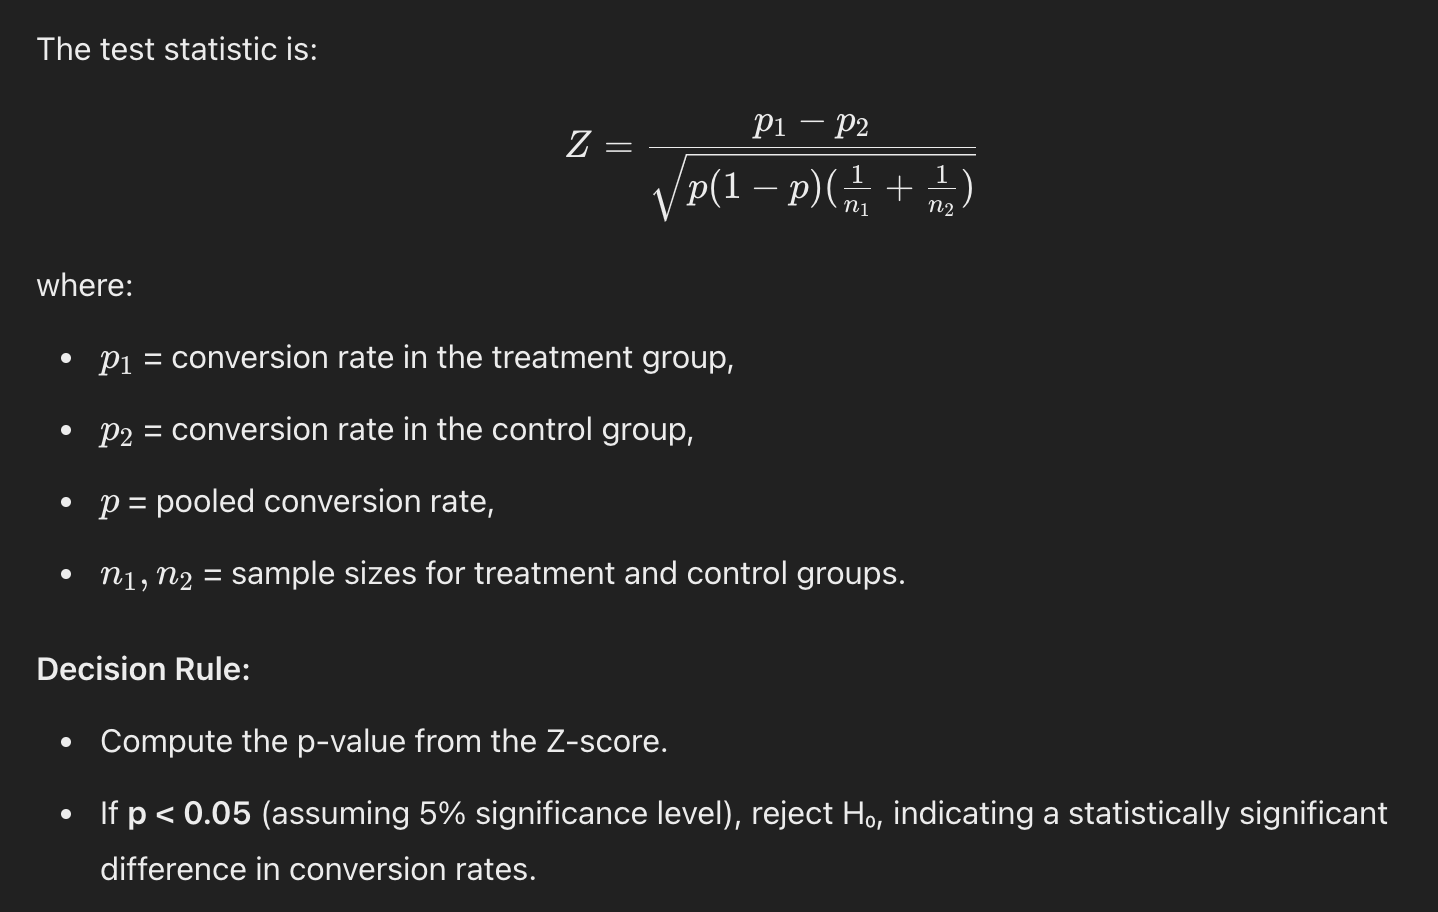

In [ ]:
# hypothesis testing to test difference between conversion rate in control and personalization using z test of proportion


# Perform a two-sample proportion z-test
from statsmodels.stats.proportion import proportions_ztest

z_stat, p_val = proportions_ztest(
    [personalization.sum(), control.sum()],  # Number of successes in each group
    [len(personalization), len(control)],    # Total number of trials in each group
    alternative='larger')  # or 'larger' or 'smaller'

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_val}")

# Interpret the results
alpha = 0.05  # significance level
if p_val < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference between the conversion rates.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference between the conversion rates.")


Z-statistic: 2.720914236163232
P-value: 0.003255082462873688
Reject the null hypothesis. There is a statistically significant difference between the conversion rates.


Therefore, we reject the null hypothesis of no difference between proportions at the 10%, 5% and 1% levels of significance.

<br>

So we can say that the observed difference between the conversion rates of personalised and generic emails is statistically significant. The chances of getting such a substantial difference under the null hypothesis is less than 1% (0.325% to be exact) - so the likelihood that we have wrongfully rejected the null hypothesis is less than 0.35%.


In [ ]:
help(sm.stats.proportions_ztest)

Help on function proportions_ztest in module statsmodels.stats.proportion:

proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)
    Test for proportions based on normal (z) test
    
    Parameters
    ----------
    count : {int, array_like}
        the number of successes in nobs trials. If this is array_like, then
        the assumption is that this represents the number of successes for
        each independent sample
    nobs : {int, array_like}
        the number of trials or observations, with the same length as
        count.
    value : float, array_like or None, optional
        This is the value of the null hypothesis equal to the proportion in the
        case of a one sample test. In the case of a two-sample test, the
        null hypothesis is that prop[0] - prop[1] = value, where prop is the
        proportion in the two samples. If not provided value = 0 and the null
        is prop[0] = prop[1]
    alternative : str in ['two-sided', 'sma

###A/B Testing & Segmentation

Now we take a look at how the personalization feature impacts specific demographics - language and age group

In [ ]:
# defining function that carries out A/B test for different segments of the population

def ab_segmentation(segment):

  # Build a for loop for each segment in marketing
  for subsegment in np.unique(marketing_data[segment].values):

    print(subsegment)

    # Limit marketing to email and subsegment
    email = marketing_data[(marketing_data['marketing_channel'] == 'Email') & (marketing_data[segment] == subsegment)]

    subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
    subscribers = pd.DataFrame(subscribers.unstack(level=1))
    control = subscribers['control'].dropna()
    personalization = subscribers['personalization'].dropna()



    lift_segment = lift(personalization,control)
    print(f'lift: {round(lift_segment, 3)}%')



    print('Two sample z-test for difference between population proportions')

    alpha = 0.05

    if lift_segment >= -5 and lift_segment <= 5:

      z_stat, p_val = proportions_ztest([personalization.sum(),control.sum()],[len(personalization),len(control)],alternative='two-sided')
      print(f'Two tailed test - Ho: No difference in conversion rate, Ha: Difference in conversion rate')

      if p_val < alpha:
        print(f'Z-statistic = {round(z_stat,4)}, p-value = {round(p_val,4)} | Reject the null hypothesis. There is a statistically significant difference between the conversion rates at the 5% significance level.')
      else:
        print(f'Z-statistic = {round(z_stat,4)}, p-value = {round(p_val,4)} | Fail to reject the null hypothesis. There is no statistically significant difference between the conversion rates at the 5% significance level.')


    elif lift_segment > 5:

      z_stat, p_val = proportions_ztest([personalization.sum(),control.sum()],[len(personalization),len(control)],alternative='larger')
      print(f'Right tailed test - Ho: No difference in conversion rate, Ha: Conversion rate is higher for the personalization group')


      if p_val < alpha:
        print(f'Z-statistic = {round(z_stat,4)}, p-value = {round(p_val,4)} | Reject the null hypothesis. Conversion rate for personalization is higher, and is statistically significant at the 5% significance level.')
      else:
        print(f'Z-statistic = {round(z_stat,4)}, p-value = {round(p_val,4)} | Fail to reject the null hypothesis. There is no statistically significant difference between the conversion rates at the 5% significance level.')


    else:

      z_stat, p_val = proportions_ztest([personalization.sum(),control.sum()],[len(personalization),len(control)],alternative='smaller')
      print(f'Right tailed test - Ho: No difference in conversion rate, Ha: Conversion rate is lower for the personalization group')


      if p_val < alpha:
        print(f'Z-statistic = {round(z_stat,4)}, p-value = {round(p_val,4)} | Reject the null hypothesis. Conversion rate for personalization is lower, and is statistically significant at the 5% significance level.')
      else:
        print(f'Z-statistic = {round(z_stat,4)}, p-value = {round(p_val,4)} | Fail to reject the null hypothesis. There is no statistically significant difference between the conversion rates at the 5% significance level.')



    print('\n\n')



In [ ]:
ab_segmentation('language_preferred')

Arabic
lift: 50.0%
Two sample z-test for difference between population proportions
Right tailed test - Ho: No difference in conversion rate, Ha: Conversion rate is higher for the personalization group
Z-statistic = 0.6325, p-value = 0.2635 | Fail to reject the null hypothesis. There is no statistically significant difference between the conversion rates at the 5% significance level.



English
lift: 37.09%
Two sample z-test for difference between population proportions
Right tailed test - Ho: No difference in conversion rate, Ha: Conversion rate is higher for the personalization group
Z-statistic = 2.1313, p-value = 0.0165 | Reject the null hypothesis. Conversion rate for personalization is higher, and is statistically significant at the 5% significance level.



German
lift: -1.62%
Two sample z-test for difference between population proportions
Two tailed test - Ho: No difference in conversion rate, Ha: Difference in conversion rate
Z-statistic = -0.1954, p-value = 0.8451 | Fail to re

In [ ]:
ab_segmentation('age_group')

0-18 years
lift: 121.4%
Two sample z-test for difference between population proportions
Right tailed test - Ho: No difference in conversion rate, Ha: Conversion rate is higher for the personalization group
Z-statistic = 2.8611, p-value = 0.0021 | Reject the null hypothesis. Conversion rate for personalization is higher, and is statistically significant at the 5% significance level.



19-24 years
lift: 106.242%
Two sample z-test for difference between population proportions
Right tailed test - Ho: No difference in conversion rate, Ha: Conversion rate is higher for the personalization group
Z-statistic = 2.9348, p-value = 0.0017 | Reject the null hypothesis. Conversion rate for personalization is higher, and is statistically significant at the 5% significance level.



24-30 years
lift: 161.185%
Two sample z-test for difference between population proportions
Right tailed test - Ho: No difference in conversion rate, Ha: Conversion rate is higher for the personalization group
Z-statistic 

We found that personalisation was extremely effective for younger groups but less effective than the control for older groups. One explanation might be that younger users understand how their data might be used online and think personalization is cool because it gives them more insight into themselves while older people might feel that this is a violation of their privacy.